#  Stacking Ensemble Models

## combine both XGBoost + LightGBM + Logistic Regression

In [1]:
#download data from kaggle
!pip install opendatasets --quiet

In [2]:
!pip install shap lime --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!pip install -U scikit-learn==1.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [4]:
import shap
import joblib
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt

In [5]:
od.download("https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?select=loan_data.csv")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemantk777
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data


100%|██████████| 751k/751k [00:00<00:00, 475MB/s]

In [6]:
data=pd.read_csv("/content/loan-approval-classification-data/loan_data.csv")

In [7]:
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

In [9]:
# Load your pipeline and data
pipeline = joblib.load("/content/loan_pipeline.pkl")

In [11]:
pipeline.named_steps

{'preprocess': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['person_age', 'person_income',
                                   'person_emp_exp', 'loan_amnt',
                                   'loan_int_rate', 'loan_percent_income',
                                   'cb_person_cred_hist_length',
                                   'credit_score']),
                                 ('cat',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['person_gender', 'person_education',
                                   'person_home_ownership', 'loan_intent',
                                   'previous_loan_defaults_on_file'])]),
 'model': LogisticRegression()}

In [10]:
# Get transformed feature names from ColumnTransformer
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()

In [12]:
# Get preprocessed numeric features
X_transformed = pipeline.named_steps['preprocess'].transform(X)
# Convert transformed array back to DataFrame with correct column names
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

# Step-by-Step Code (Stacking Steps)

In [13]:
# 1. Data Preparation
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)


In [14]:
# 2. Build Base Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
lgbm = LGBMClassifier()
rf = RandomForestClassifier()

In [15]:
# 3. Build Meta Model and Stacking Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression()

stacked_model = StackingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('rf', rf)],
    final_estimator=meta_model,
    passthrough=False
)

stacked_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:58:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:58:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:58:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:58:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:58:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:58:08] WARNING: /w

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6392, number of negative: 22408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6392, number of negative: 22408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

,estimators,"[('xgb', ...), ('lgbm', ...), ...]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [16]:
# 4. Evaluate Model Performance
from sklearn.metrics import classification_report

y_pred = stacked_model.predict(X_test)
print("📊 Stacked Model Performance:")
print(classification_report(y_test, y_pred))

📊 Stacked Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



,estimators,"[('xgb', ...), ('lgbm', ...), ...]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [20]:
#Save the Model
import joblib
joblib.dump(stacked_model, "stacked_model_1.pkl")

['stacked_model_1.pkl']

In [18]:
# 5. Compare with Base Models (Optional)
xgb.fit(X_train, y_train)
print("XGBoost:", classification_report(y_test, xgb.predict(X_test)))

lgbm.fit(X_train, y_train)
print("LightGBM:", classification_report(y_test, lgbm.predict(X_test)))

rf.fit(X_train, y_train)
print("Random Forest:", classification_report(y_test, rf.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:58:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
LightGBM:               pre

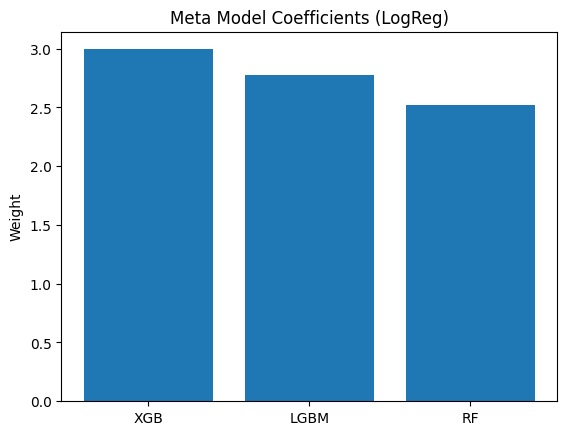

In [19]:
# Visualize Meta Model Weights
import matplotlib.pyplot as plt
import numpy as np

coef = stacked_model.final_estimator_.coef_.flatten()

n_base_models = 3
base_model_coef = coef[:n_base_models]
original_feat_coef = coef[n_base_models:]

plt.bar(["XGB", "LGBM", "RF"], base_model_coef)
plt.title("Meta Model Coefficients (LogReg)")
plt.ylabel("Weight")
#plt.savefig("Meta Model Coefficients (LogReg).png", dpi=300, bbox_inches='tight')
plt.show()


#  SHAP & LIME with Ensemble Models (Stacking)

## SHAP

In [23]:
import shap

In [ ]:
shap.plots.backend = "matplotlib"   # Use matplotlib backend for plots

100%|===================| 44844/45000 [03:05<00:00]       

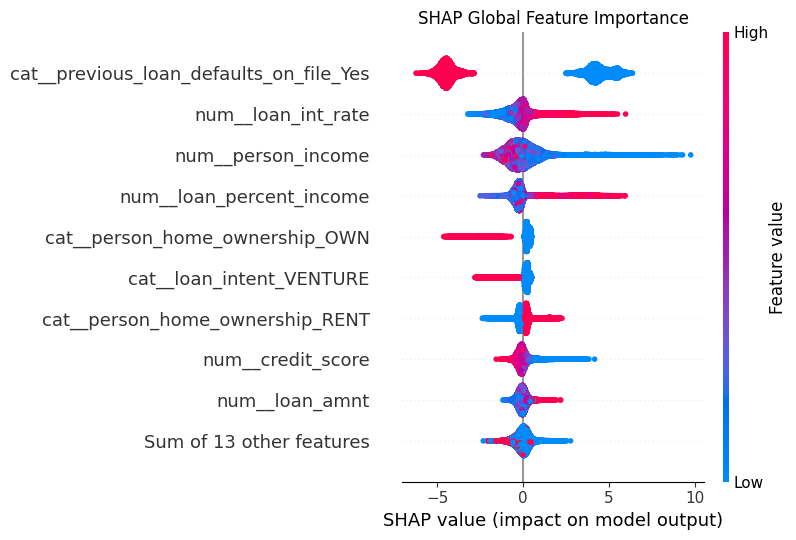

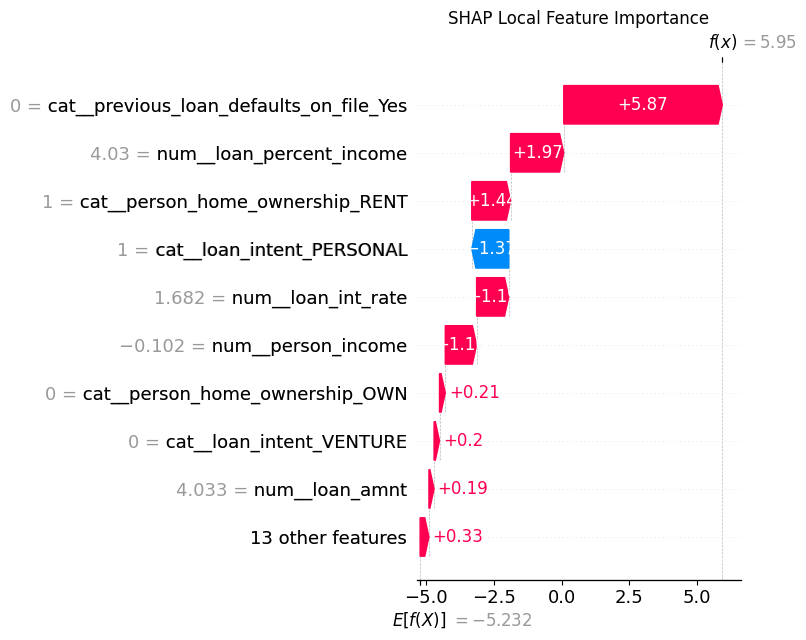

In [27]:
base_model = stacked_model.named_estimators_['xgb']  # or 'lgbm'

explainer = shap.Explainer(base_model, X_transformed_df)
shap_values = explainer(X_transformed_df)

# Global importance
shap.plots.beeswarm(shap_values,show=False)
plt.title("SHAP Global Feature Importance")
plt.tight_layout()
plt.savefig("global importance(xgb).png", dpi=300, bbox_inches='tight')
plt.show()

# Local explanation for one instance
shap.plots.waterfall(shap_values[0],show=False)
plt.title("SHAP Local Feature Importance")
plt.tight_layout()
plt.savefig("local importance(xgb).png", dpi=300, bbox_inches='tight')
plt.show()

100%|===================| 44931/45000 [02:58<00:00]       

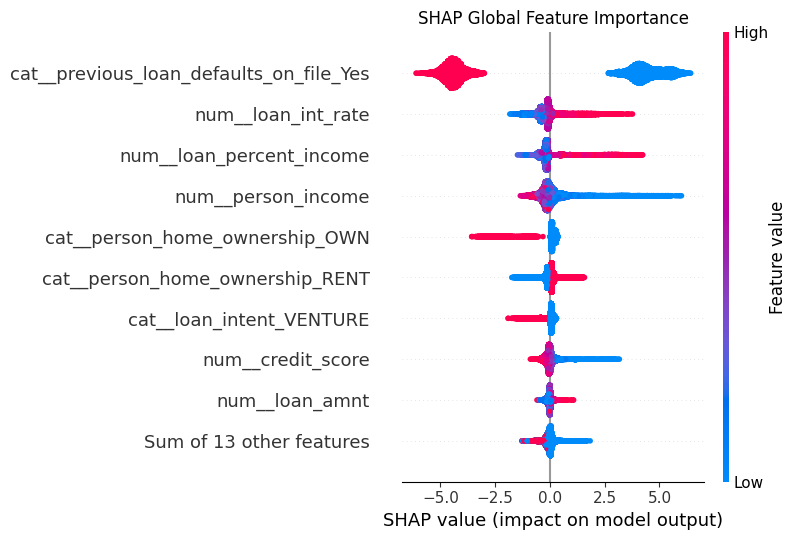

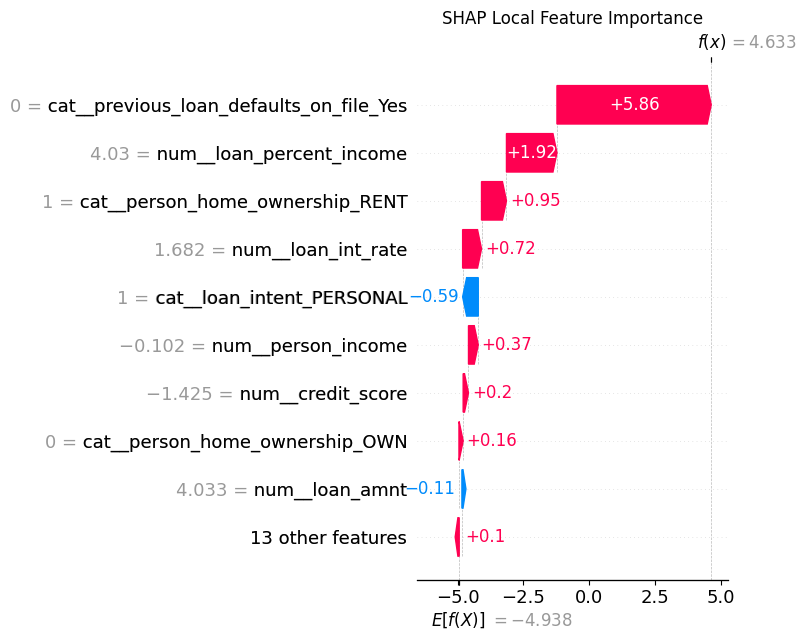

In [28]:
base_model = stacked_model.named_estimators_['lgbm']

explainer = shap.Explainer(base_model, X_transformed_df)
shap_values = explainer(X_transformed_df)

# Global importance
shap.plots.beeswarm(shap_values,show=False)
plt.title("SHAP Global Feature Importance")
plt.tight_layout()
plt.savefig("global importance(lgbm).png", dpi=300, bbox_inches='tight')
plt.show()

# Local explanation for one instance
shap.plots.waterfall(shap_values[0],show=False)
plt.title("SHAP Local Feature Importance")
plt.tight_layout()
plt.savefig("local importance(lgbm).png", dpi=300, bbox_inches='tight')
plt.show()

## LIME

In [29]:
import lime
import lime.lime_tabular

In [30]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_transformed_df),
    feature_names=X_transformed_df.columns,
    class_names=["Not Approved", "Approved"],
    mode="classification"
)

exp = explainer.explain_instance(
    data_row=X_transformed_df.iloc[0],
    predict_fn=stacked_model.predict_proba
)

exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

#  Prompt Engineering + LLM Integration for ML

In [32]:
# Convert Prediction to Human Language
prediction = stacked_model.predict([X_transformed_df.iloc[0]])[0]
probabilities = stacked_model.predict_proba([X_transformed_df.iloc[0]])[0]

result = {
    "prediction": "Approved" if prediction == 1 else "Not Approved",
    "confidence": f"{max(probabilities) * 100:.2f}%"
}
print(result)

{'prediction': 'Approved', 'confidence': '98.60%'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 3.3 MB/s eta 0:00:00


In [39]:
# Send Context to LLM (Example with API)
from groq import Groq

You can sign up at https://groq.com to get a free API key.

In [41]:
client =Groq(api_key="key")  # insert your key

prompt = f"""
You are a financial loan analyst.
The model predicted: {result['prediction']} with confidence {result['confidence']}.
The features for this customer are: {dict(X_transformed_df.iloc[0])}.
Explain to the customer in plain English why this decision might have been made.
"""

response = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[{"role": "system", "content": "You are a helpful assistant."},{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

Congratulations! Our model has predicted that your loan application has been approved with a high level of confidence. I'd be happy to explain why this decision might have been made.

Based on the features we've analyzed, here are some key factors that contributed to this positive outcome:

1. **Financial stability**: Our model notes that you have a stable income and a relatively low loan amount, which suggests that you have a manageable debt load.
2. **Credit score**: Although your credit score is not exceptional, it's not significantly low either. This indicates that you have a reasonable credit history.
3. **Education and occupation**: Your master's degree and possibly professional occupation might have contributed to a higher level of stability and financial responsibility.
4. **Home ownership**: Renting your home instead of owning it could be perceived as a more manageable debt load, which might have been viewed positively by the model.
5. **Loan purpose**: Your loan intent is for